In [4]:
import joypy
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [6]:
# Load NETCDF files for all years

test_eff = pd.read_csv('/project2/geos39650/jet_stream/data/t2m_per_eff_latitude.csv')

In [21]:
test_eff

,time,left_temp_interval,right_temp_interval,eff_latitude,week_year
0,2007-12-02,218,223,NaN,2007-48
1,2007-12-02,223,228,1.563757,2007-48
2,2007-12-02,228,233,1.516448,2007-48
3,2007-12-02,233,238,1.412669,2007-48
4,2007-12-02,238,243,1.255504,2007-48
...,...,...,...,...,...
247,2008-03-02,283,288,NaN,2008-09
248,2008-03-02,288,293,NaN,2008-09
249,2008-03-02,293,298,NaN,2008-09
250,2008-03-02,298,303,NaN,2008-09


In [15]:
test_eff['week_year'] = pd.to_datetime(test_eff.time)
test_eff['week_year'] = test_eff.week_year.dt.strftime('%Y-%U')

In [23]:
test_eff_filter = test_eff.filter(['week_year', 'eff_latitude'])

In [24]:
test_eff_filter

,week_year,eff_latitude
0,2007-48,NaN
1,2007-48,1.563757
2,2007-48,1.516448
3,2007-48,1.412669
4,2007-48,1.255504
...,...,...
247,2008-09,NaN
248,2008-09,NaN
249,2008-09,NaN
250,2008-09,NaN


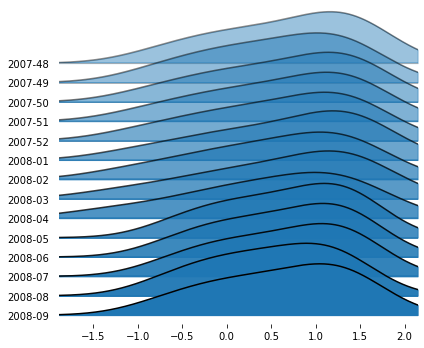

In [36]:
fig, axes = joypy.joyplot(test_eff_filter, 
                          by='week_year',
                         grid='y',
                         fade=True,
                         figsize=(6, 5))
plt.savefig('fake_eff_latitude.pdf')

In [5]:
cesm = xr.open_dataset('/project2/geos39650/jet_stream/data/CESM2-WACCM_ssp585_tas.nc4')

In [6]:
cesm

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 3012)
Coordinates:
    lon_bnds   (lon, nbnd) float32 ...
    lat_bnds   (lat, nbnd) float32 ...
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2100-12-15 12:00:00
    time_bnds  (time, nbnd) object ...
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  20075.0
    case_id:                4
    cesm_casename:          b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-30T22:37:15Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2-W...
    grid:                   native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label:             gn
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2-WACCM
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2-WACCM
    source_type:            AOGCM BGC CHEM AER
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/55a8af4c-3729-4051-9e53-f22295c2ec1c
    variable_id:            tas
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu

In [7]:
cesm.time.values

array([cftime.DatetimeNoLeap(1850-01-15 12:00:00),
       cftime.DatetimeNoLeap(1850-02-14 00:00:00),
       cftime.DatetimeNoLeap(1850-03-15 12:00:00), ...,
       cftime.DatetimeNoLeap(2100-10-15 12:00:00),
       cftime.DatetimeNoLeap(2100-11-15 00:00:00),
       cftime.DatetimeNoLeap(2100-12-15 12:00:00)], dtype=object)

In [8]:
(2100 - 1850) * 12

3000